# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** ZULFAN ZIDNI ILHAMA
- **Email:** bigbrtha0@gmail.com
- **ID Dicoding:** zulfanzidni

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan pada e-commerce?
- Produk mana yang paling laris di antara semua produk yang tersedia?
- Bagaimana tingkat kepuasan pelanggan terhadap produk yang dibelinya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/customers_dataset.csv")

In [4]:
geoloc_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/geolocation_dataset.csv")

In [5]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/order_items_dataset.csv")

In [6]:
order_pay_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/order_payments_dataset.csv")

In [7]:
order_rev_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/order_reviews_dataset.csv")

In [8]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/orders_dataset.csv")

In [9]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/product_category_name_translation.csv")

In [10]:
product_name_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/products_dataset.csv")

In [11]:
seller_df = pd.read_csv("https://raw.githubusercontent.com/Fanbop/ProyekAnalisisData/main/data/sellers_dataset.csv")

### Assessing Data

- **customers_df**

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe(include="all")

Jumlah duplikasi:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


- **geoloc_df**

In [15]:
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geoloc_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ",geoloc_df.duplicated().sum())
geoloc_df.describe(include='all')

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


- **order_items_df**

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- **order_pay_df**

In [21]:
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
order_pay_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
print("Jumlah duplikasi: ",order_pay_df.duplicated().sum())
order_pay_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- **order_rev_df**

In [24]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_rev_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
print("Jumlah duplikasi: ",order_rev_df.duplicated().sum())
order_rev_df.describe(include="all")

Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


- **orders_df**

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe(include='all', datetime_is_numeric=True)

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


- **product_category_df**

In [30]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


- **product_name_df**

In [33]:
product_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
product_name_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
print("Jumlah duplikasi: ",product_name_df.duplicated().sum())
product_name_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


- **seller_df**

In [36]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [38]:
print("Jumlah duplikasi: ",seller_df.duplicated().sum())
seller_df.describe(include="all")

Jumlah duplikasi:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

####**geoloc_df**

Meskipun terdapat banyak data yang duplikat pada kolom "geolocation_state" dan "geolocation_city", namun kita tidak perlu membuangnya(drop), karena hal itu berhubungan dengan alamat pengiriman customer

####**order_items_df**

Mengubah tipe kolom "shipping_limit_date" menjadi tipe datetime

In [39]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [40]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


####**order_rev_df**

Terdapat nilai NaN Pada kolom "**review_comment_title**" dan "**review_comment_message**", hal ini dikarenakan customer tidak meninggalkan review pada product yang telah mereka beli. Kita akan mengisinya dengan value **"no comment"**

In [41]:
order_rev_df.fillna(value="No Comment", inplace=True)

In [42]:
order_rev_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

####**orders_df**

Mengubah kolom-kolom yang berhubungan dengan waktu menjadi tipe data datetime, dan juga terdapat nilai NaN pada kolom "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date" dikarenakan customer melakukan canceled order atau order yang dilakukan tidak dapat diproses

In [43]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [44]:
orders_df.groupby(by="order_status").order_id.nunique()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [45]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore **customers_df**

In [46]:
# Menampilkan 10 data acak pada dataframe customers_df
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
8066,625243048f1ccf53f22fcbf49cfc1cf7,17ebddb6a60530cec37f8b17bf53c3ad,92200,canoas,RS
46895,365686a7c86e75148a456893fc8c2708,8e2e1d4e6eb761a382c637ac69e70f74,12951,atibaia,SP
87256,4b740cad2c22a5ac0556c056c494f478,a26fff917d367b218a794da1eecba3fc,88220,itapema,SC
6616,35cc89fc7a4a108e58af6d20943348d6,9153abcd7cd28665a59d5fba3a9ef152,51170,recife,PE
47822,c6ea850448ad7e05a9f46ddeb5673832,3ba89a1b18fd7cb3c8aa157f454ff4c8,27963,macae,RJ
40806,536a2fcac70ed8aff558adb4f533a6af,74504bb83eef70eb4974a7506a0b6ca0,89824,bom jesus,SC
7000,0733254820b3e1198c31e190f4f2c67e,1645bb66e89f31b20d9e34ba465e099e,73025,brasilia,DF
80280,370da8bc336d0b2d5bc884e65bff4c68,1a2c2b108bb52869a5b85dc63b2b70cc,22245,rio de janeiro,RJ
37928,feae0a23516453acf26b416ec51be86c,380444b18bff5028f5055fc3d9cd9e6b,88331,balneario camboriu,SC
76245,7e550164be02975a52464fc6019cac13,2f5774d283a746dd2373bd61a6aeab02,4405,sao paulo,SP


In [47]:
# Menampilkan persebaran customer berdasarkan state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [48]:
# Menampilkan persebaran customer berdasarkan city
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [49]:
customers_df.groupby(by=["customer_state", "customer_city"]).agg({
    "customer_id": "nunique"
})

customer_id
customer_state customer_city                       
AC             brasileia                          1
               cruzeiro do sul                    3
               epitaciolandia                     1
               manoel urbano                      1
               porto acre                         1
...                                             ...
TO             silvanopolis                       1
               sitio novo do tocantins            2
               taguatinga                         3
               tocantinopolis                     7
               xambioa                            3

[4310 rows x 1 columns]

###Explore **orders_df**

In [50]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36776,357b3e52b16c253a241494d7350a7f3d,6e599680fac6fedcf093d102468a9676,delivered,2017-05-28 01:17:58,2017-05-28 01:30:09,2017-05-29 13:52:16,2017-06-08 17:40:05,2017-06-29
29785,5f4c10d4bedd746cefe9291035d2f8a4,27c780104447b3e818131d9e17e58c00,delivered,2018-08-04 17:06:08,2018-08-07 04:24:31,2018-08-07 11:15:00,2018-08-16 23:31:32,2018-08-15
64212,d66f600192d8edbb336c4da0bb0e2d61,222b1c93ba4f0564fd2f1c2719097299,delivered,2017-11-21 10:42:50,2017-11-22 02:48:29,2017-11-22 19:35:38,2017-11-30 21:03:03,2017-12-19
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
81260,adb1802d9eaab059b7b624f5013159c0,035d022d08cfd373cd52040fc4485e78,delivered,2018-07-31 11:36:09,2018-07-31 12:31:15,2018-08-01 10:31:00,2018-08-02 22:51:56,2018-09-04


In [51]:
# Menambahkan kolom delivery time
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
# Konversi ke hari
orders_df["delivery_time"] = round(delivery_time/(24 * 60 * 60))

In [52]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
37620,4fde26fa2510c48a5de5fd2fd876745d,610f4bb4b87c0b59529b0e7ceb282e59,delivered,2017-05-04 07:28:27,2017-05-04 07:42:27,2017-05-04 15:04:42,2017-05-17 12:33:16,2017-05-31,13.0
75844,e5d3ccacd4c9d00c28a3f328f72b254f,43255747b350f79ef9efb92fc90098c6,delivered,2017-02-14 12:52:10,2017-02-14 13:05:46,2017-02-22 13:49:35,2017-03-06 08:32:06,2017-03-15,12.0
14573,662c204ba347d430c0fc3a5df267478f,1e3512ce753ab87c643855569b8b23e1,delivered,2018-03-30 19:08:13,2018-03-30 19:50:09,2018-04-13 17:42:12,2018-04-16 23:12:03,2018-04-27,3.0
30629,cd49c5c6f772ac87200f116a7a5499e5,c68f1a0b156eeb49b2b3168e4ab55681,delivered,2017-03-08 01:59:31,2017-03-09 02:51:06,2017-03-09 13:31:27,2017-03-14 10:34:44,2017-03-29,5.0
2545,af392de2586db1645a4044ef1e84c47a,7f4f922b7b111237fc0e33a6533773df,delivered,2018-02-25 21:32:20,2018-02-25 21:48:06,2018-03-01 01:25:04,2018-03-18 16:16:57,2018-03-16,18.0


In [53]:
orders_df.describe()

,delivery_time
count,96475.000000
mean,9.292314
std,8.776671
min,-16.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,205.000000


####Merge customers_df dan orders_df

**customers_order_df**

In [54]:
customers_orders_df = pd.merge (
    left = customers_df,
    right = orders_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
customers_orders_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [55]:
# Menghitung jumlah order berdasarkan status ordernya
customers_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(5)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
Name: order_id, dtype: int64

###Explore product_name_df

In [56]:
product_name_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32290,bf7db234b1df51fc5383311019d63fae,cama_mesa_banho,58.0,271.0,1.0,1600.0,34.0,7.0,32.0
2766,eb1e85561435be5d1760939dac8c881c,agro_industria_e_comercio,41.0,472.0,4.0,400.0,30.0,20.0,11.0
25621,1b28df0b54809d40f2bd2f2218c601a2,alimentos_bebidas,59.0,3762.0,1.0,875.0,23.0,17.0,17.0
30306,b1418867113446b20f726f21d7b041e7,automotivo,50.0,1584.0,3.0,150.0,19.0,19.0,14.0
14442,781de17434dbb8244fd1d0e3ef55d3bb,consoles_games,50.0,996.0,1.0,500.0,16.0,13.0,21.0


####Merge **product_name_df** dan **product_category_df**

In [57]:
products_df = pd.merge (
    left = product_name_df,
    right = product_category_df,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [58]:
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

###Explore **order_pay_df**

In [59]:
order_pay_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
74668,60fedd48f279e3f0ce27e48d6d7b895d,1,credit_card,5,122.31
98205,d4e1ef173ac9e00a6f0c0bd6954183aa,1,boleto,1,429.09
94996,e5e12a01a9496a4f4768f75ec5292056,1,credit_card,17,170.00
62937,cb70b6a0c936ad1d4abaf743ee8f36c5,1,boleto,1,113.11
47235,275d77a4c30d29824ec29e90244c95f4,1,credit_card,1,35.77


In [60]:
# Menampilkan jumlah transaksi yang terjadi berdasarkan jenis pembayarannya
order_pay_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [61]:
order_rev_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
78662,f4e4fa37bd9ab993f1e926263f40773d,ecf00baec9a9c525884afca18d5d3cad,4,No Comment,No Comment,2017-09-06 00:00:00,2017-11-28 17:31:40
43052,05d22b256100d05a35a1f46be8dd6428,d1d422dc16b191028b0d2eb2a06b9668,5,No Comment,No Comment,2017-10-10 00:00:00,2017-10-10 23:40:47
72502,f08a60aa9a4cf3a1ba2fdc5d99b6d640,f2307c6c281dc9e69cee79495692066a,4,recomendo,No Comment,2018-08-30 00:00:00,2018-09-02 00:32:06
13624,347779bb1eed5b9057a88d6361308e2b,462f1226eadb17cabaa2323b360486aa,5,No Comment,No Comment,2018-03-22 00:00:00,2018-03-22 23:42:12
10676,221f53f6c043da0e5edf4b393958cbbd,126778d3b4dab2077cf95c20808141bd,5,No Comment,No Comment,2017-07-21 00:00:00,2017-07-21 23:33:21


In [62]:
order_rev_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

####Merge **order_pay** dan **order_rev**

In [63]:
payment_review_df = pd.merge (
    left = order_pay_df,
    right = order_rev_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
payment_review_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,No Comment,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Comment,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,No Comment,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,No Comment,2017-12-21 00:00:00,2017-12-22 01:10:39


####Merge **order_items_df** dan **Seller_df**

In [64]:
item_seller_df = pd.merge (
    left = order_items_df,
    right = seller_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
item_seller_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


###Merge **customers_orders_df** dan **payment_review_df**

In [65]:
customers_payment_df = pd.merge (
    left = customers_orders_df,
    right = payment_review_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
customers_payment_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,No Comment,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,No Comment,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,No Comment,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,No Comment,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


###Merge products_df dan item_seller_df

In [66]:
products_seller_df = pd.merge (
    left = products_df,
    right = item_seller_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
products_seller_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


###**Explore All Data**

####Merge All_df

In [67]:
all_df = pd.merge (
    left = customers_payment_df,
    right = products_seller_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
all_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [68]:
# Harga dan biaya pengiriman berdasarkan kategori product dan kota pelanggan
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [69]:
# Pengelompokkan berdasarkan customer state dan kategori produk
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [70]:
# Jumlah transaksi yang terjadi berdasarkan customer state
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [71]:
# Konversi all_df menjadi file .csv
all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan pada e-commerce?

In [72]:
# Menjumlahkan order menjadi per bulan
monthly_orders_df = all_df.resample(rule="M", on="order_approved_at").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
# Mengubah indeks menjadi nama bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
# Reset indeks dan mengubah nama kolom
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df

,order_approved_at,order_count,revenue
0,September,1,0.00
1,October,320,75985.54
2,November,0,0.00
3,December,1,19.62
4,January,760,182178.36
5,February,1765,350023.57
6,March,2689,547228.40
7,April,2374,506593.88
8,May,3693,736346.88
9,June,3252,620191.15


In [73]:
# Mengurutkan DataFrame berdasarkan kolom order_count dan menjaga baris dengan nilai terakhir untuk setiap order_approved_at
monthly_orders_df = monthly_orders_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_orders_df

,order_approved_at,order_count,revenue
12,September,4301,927821.13
13,October,4590,1138730.07
15,December,5832,1092932.59
21,June,6164,1306785.03
22,July,6176,1334156.42
23,August,6620,1268960.54
17,February,6706,1314882.87
19,April,6778,1476502.25
20,May,7066,1545868.81
16,January,7187,1406557.66


In [74]:
# Memetakan nama bulan
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Menambahkan kolom "month_numeric"
monthly_orders_df["month_numeric"] = monthly_orders_df["order_approved_at"].map(month_mapping)

# Mengurutkan DataFrame berdasarkan nilai 'month_numeric'
monthly_orders_df = monthly_orders_df.sort_values("month_numeric")

# Menghapus kolom
monthly_orders_df = monthly_orders_df.drop("month_numeric", axis=1)

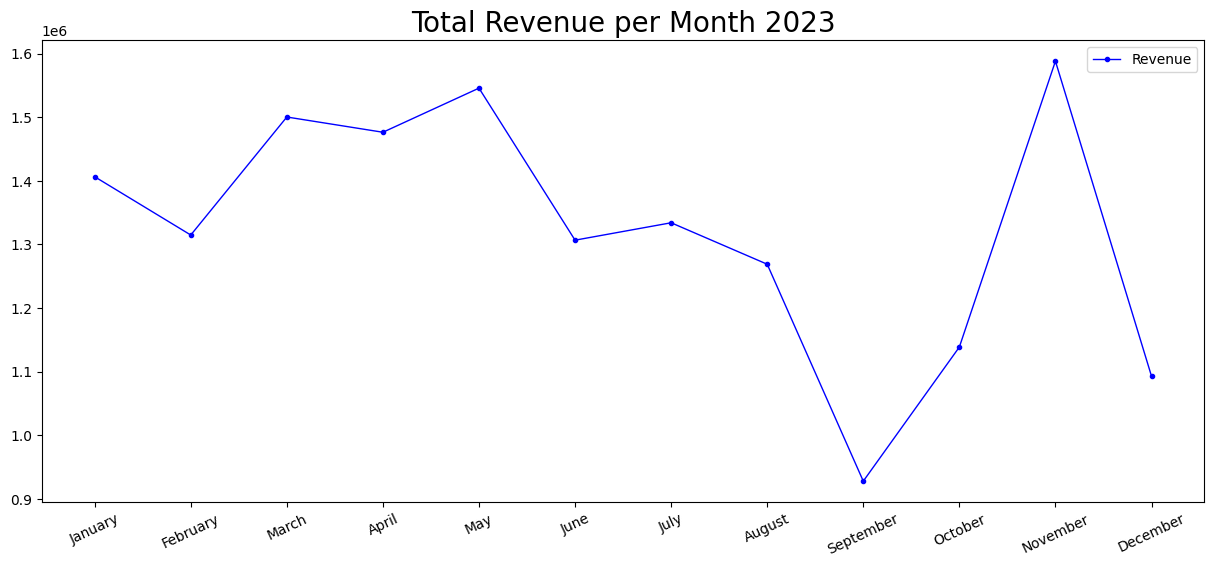

In [75]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders_df['order_approved_at'], monthly_orders_df['revenue'], label="Revenue" ,marker=".", linewidth=1, color='blue')
plt.title('Total Revenue per Month 2023', size=20, loc='center')
plt.xticks(fontsize=10, rotation=25)
plt.legend()
plt.show()

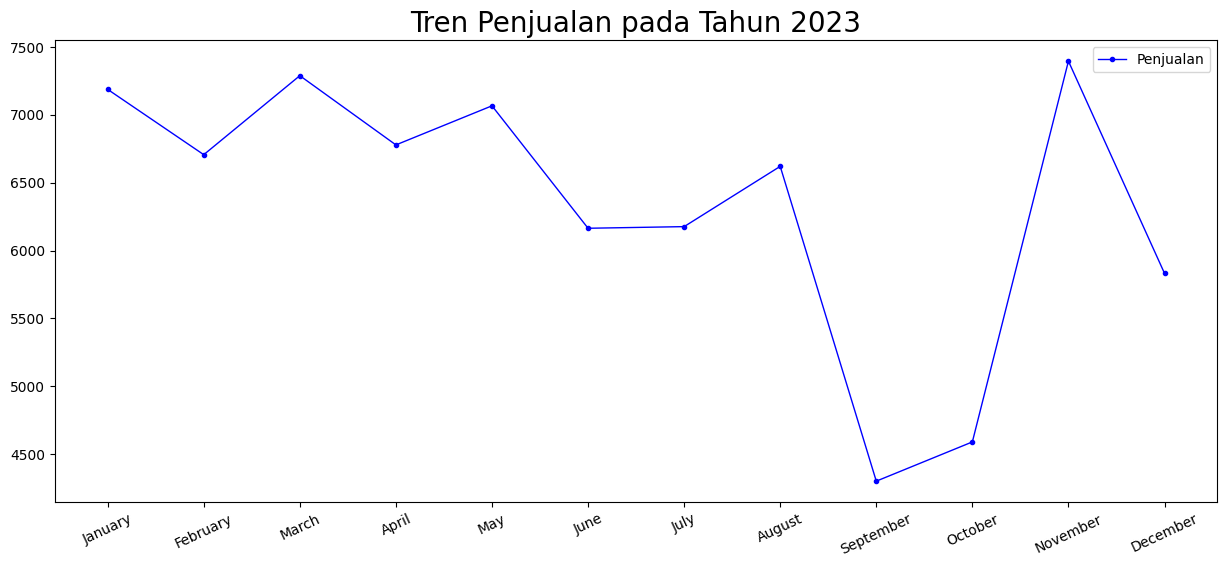

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders_df['order_approved_at'], monthly_orders_df['order_count'], label="Penjualan" ,marker=".", linewidth=1, color='blue')
plt.title('Tren Penjualan pada Tahun 2023', size=20, loc='center')
plt.xticks(fontsize=10, rotation=25)
plt.legend()
plt.show()

Dapat dilihat bahwa tren penjualan mengalami penurunan pada bulan **September** yang merupakan titik terendah, kemudian mengalami kenaikan yang signifikan pada bulan November dan penjualan terbanyak berada pada bulan **November**

### Pertanyaan 2: Produk apa yang paling laris di antara semua produk yang tersedia?

In [77]:
product_sold_df = all_df.groupby(by="product_category_name_english").agg({
  "product_id": "count"
}).sort_values(by="product_id", ascending=False).reset_index()

In [78]:
product_sold_df

,product_category_name_english,product_id
0,bed_bath_table,11988
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,16
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


In [79]:
product_sold_df.rename(columns={
    "product_category_name_english": "product",
  "product_id": "quantity"
}, inplace=True)

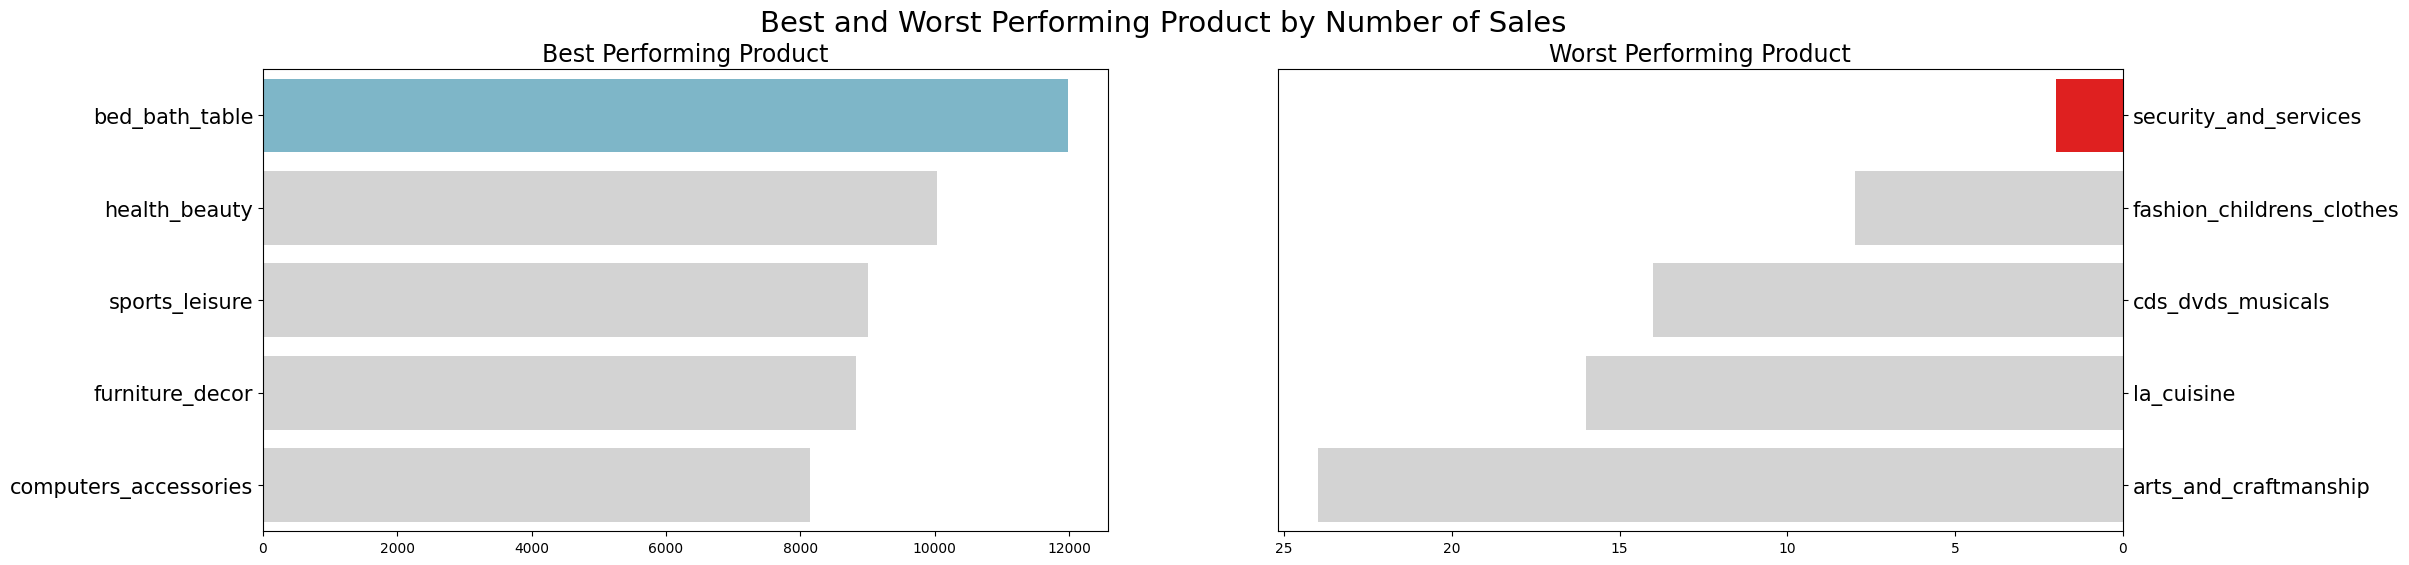

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["red", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product", data=product_sold_df.head(5), palette=colors, ax=ax[0], hue='product')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=17)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity", y="product", data=product_sold_df.sort_values(by="quantity", ascending=True).head(5), palette=colors2, ax=ax[1], hue='product')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=17)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=21)
plt.show()

Dapat diketahui bahwa **bed_bath_table** merupakan produk yang paling banyak diminati oleh pelanggan, dan sebaliknya **security_and_service** merupakan produk yang paling kurang diminati.

### Pertanyaan 3: Bagaimana tingkat kepuasan pelanggan terhadap produk yang dibelinya?

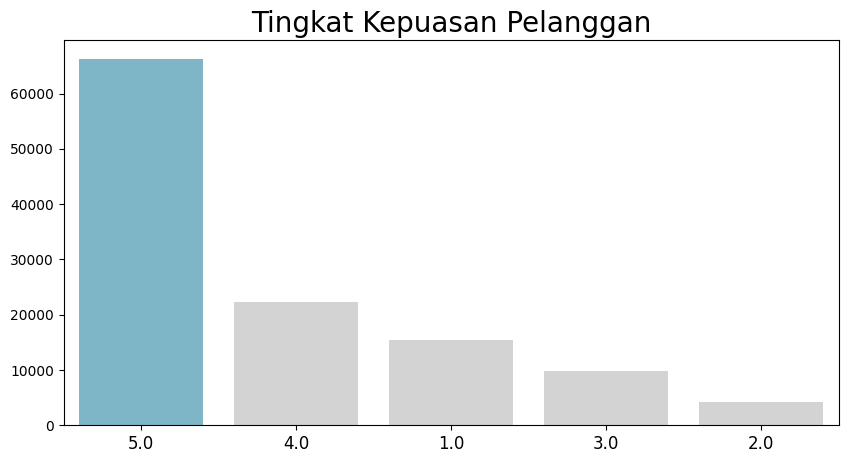

In [102]:
# Menghitung jumlah masing-masing nilai
review_scores = all_df['review_score'].value_counts().sort_values(ascending=False)
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=colors,
            hue=review_scores,
            legend=False
            )

plt.title("Tingkat Kepuasan Pelanggan", fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.show()

Mayoritas customer memiliki pengalaman berbelanja yang sangat baik, hal ini dibuktikan dengan mayoritas customer memberikan nilai 5 dengan margin yang cukup lebar antara yang lain.

## Conclusion

### Bagaimana tren penjualan pada e-commerce?


Tren penjualan mengalami penurunan pada bulan September dan kemudian mengalami kenaikkan yang signifikan pada bulan berikutnya. Hal ini dikarenakan tidak adanya hari libur atau perayaan besar pada saat bulan September yang mendorong konsumsi dan pembelian. Sementara itu pada bulan November sering kali merupakan bulan yang berisi perayaan Natal dan Black Friday. Diperlukan pendekatan khusus untuk meningkatkan penjualan pada bulan september.

### Produk apa yang paling laris di antara semua produk yang tersedia?

Dapat disimpulkan bahwa bed_bath_table merupakan produk yang paling banyak diminati oleh pelanggan, dan sebaliknya security_and_service merupakan produk yang paling kurang diminati. Untuk lebih meningkatkan penjualan produk yang kurang diminati, mungkin bisa menerapkan diskon penjualan bundle pada produk-produk yang kurang diminati dengan dipasangkan dengan produk yang lebih banyak diminati.

### Bagaimana tingkat kepuasan pelanggan terhadap produk yang dibelinya?

Mayoritas customer memiliki pengalaman belanja yang memuaskan, hal ini dibuktikan dengan sebagian besar customer memberikan review paling tinggi, yaitu nilai 5. Namun juga terdepat beberapa pelanggan yang memiliki pengalamn belanja yang kurang memuaskan. Hal ini perlu ditingkatkan agar dapat menumbuhkan loyalitas pada pelanggan, serta bisnis yang sustainable.